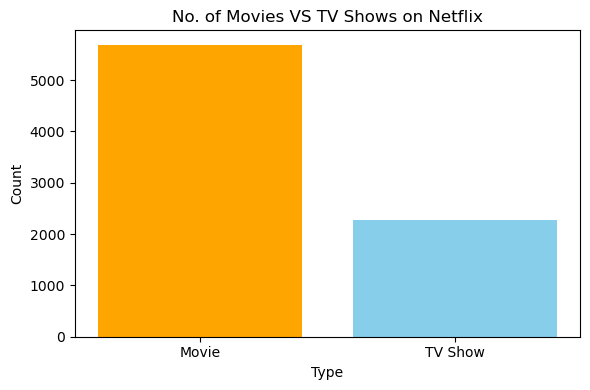

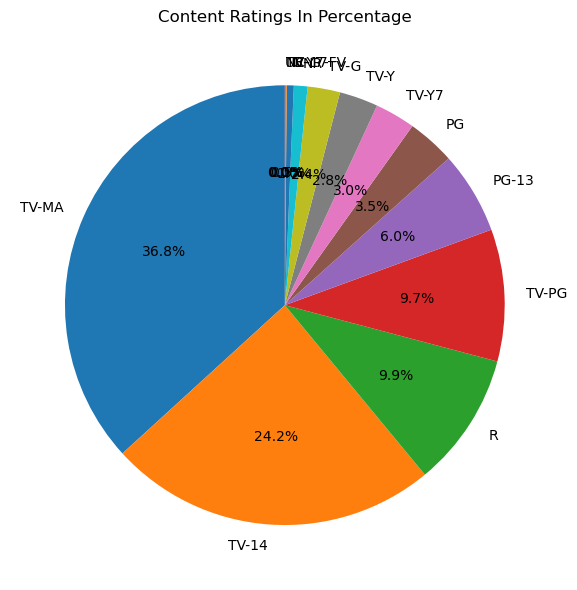

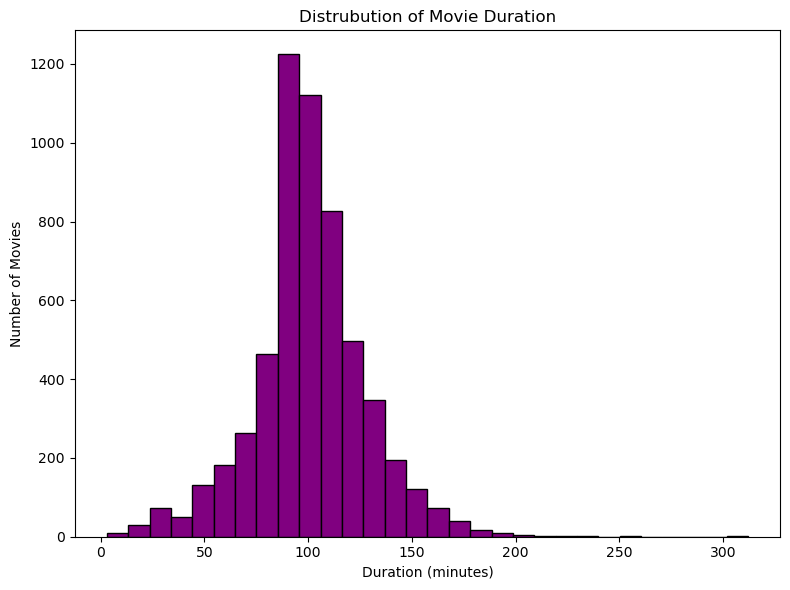

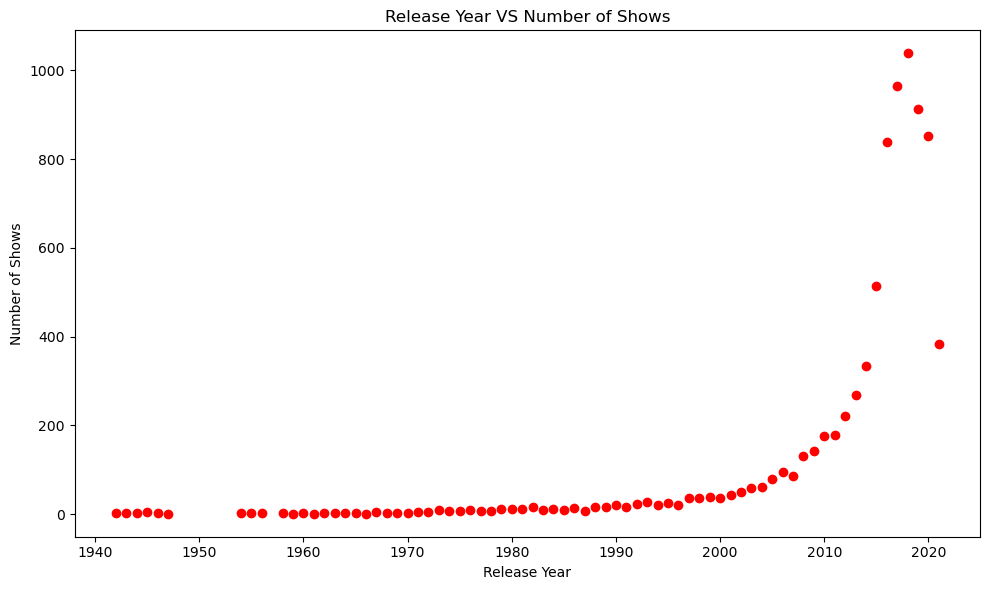

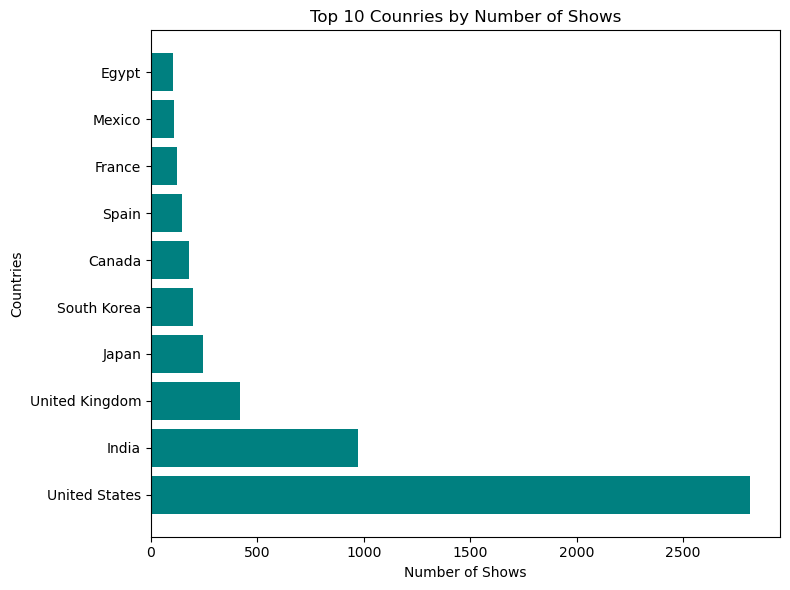

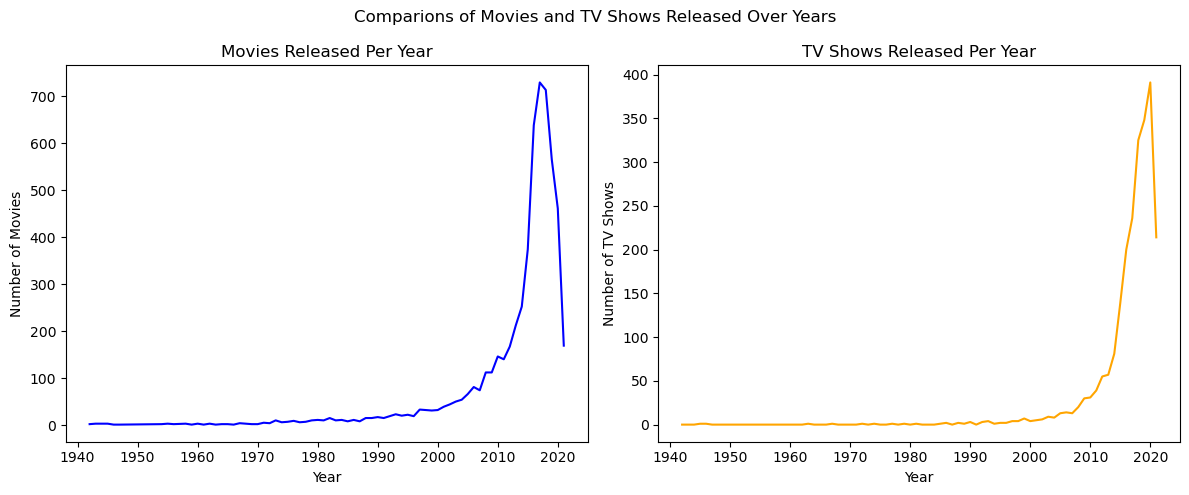

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
#loaded the dataframe
df=pd.read_csv("netflix_titles.csv") 
#clean the data (removing missing rows)
df=df.dropna(subset=['type','release_year','rating','country','duration']) 

#value_counts()=> returns a keyvalue pair of the unique value in the series and it's count
type_cnt=df['type'].value_counts() 
plt.figure(figsize=(6,4)) 
plt.bar(type_cnt.index,type_cnt.values,color=["orange","skyblue"]) 
plt.title("No. of Movies VS TV Shows on Netflix") 
plt.xlabel("Type") 
plt.ylabel("Count") 
plt.tight_layout() 
plt.savefig('movies_vs_tvshows.png') 
plt.show()  

rating_cnt=df['rating'].value_counts() 
plt.figure(figsize=(8,6)) 
plt.pie(rating_cnt.values,labels=rating_cnt.index,autopct='%1.1f%%',startangle=90) 
plt.title("Content Ratings In Percentage") 
plt.tight_layout() 
plt.savefig("Content_Ratings_Pie.png") 
plt.show() 

movie_df=df[df['type']=='Movie'].copy() 
#created a new column by converting the duration from the string to integer
movie_df['duration_int']=movie_df['duration'].str.replace(' min','').astype(int) 
plt.figure(figsize=(8,6)) 
plt.hist(movie_df['duration_int'],bins=30,color="purple", edgecolor="black") 
plt.title("Distrubution of Movie Duration") 
plt.xlabel("Duration (minutes)") 
plt.ylabel("Number of Movies") 
plt.tight_layout() 
plt.savefig("Movie_Distribution_histogram.png") 
plt.show()

release_cnt=df['release_year'].value_counts().sort_index() 
plt.figure(figsize=(10,6)) 
plt.scatter(release_cnt.index,release_cnt.values,color='red') 
plt.title("Release Year VS Number of Shows") 
plt.xlabel("Release Year") 
plt.ylabel("Number of Shows") 
plt.tight_layout() 
plt.savefig("Release_Year_Scatter.png") 
plt.show() 

country_cnt=df['country'].value_counts().head(10)  
plt.figure(figsize=(8,6)) 
plt.barh(country_cnt.index,country_cnt.values,color="teal") 
plt.title("Top 10 Counries by Number of Shows") 
plt.xlabel("Number of Shows") 
plt.ylabel("Countries") 
plt.tight_layout() 
plt.savefig("Top_10_countries.png") 
plt.show() 

content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0) 

fig,ax=plt.subplots(1,2,figsize=(12,5)) 

#First subplot:movies 
ax[0].plot(content_by_year.index,content_by_year['Movie'],color="blue") 
ax[0].set_title('Movies Released Per Year') 
ax[0].set_xlabel('Year') 
ax[0].set_ylabel('Number of Movies') 

#Second subplot:TV Shows 
ax[1].plot(content_by_year.index,content_by_year['TV Show'],color="orange") 
ax[1].set_title('TV Shows Released Per Year') 
ax[1].set_xlabel('Year') 
ax[1].set_ylabel('Number of TV Shows') 

fig.suptitle('Comparions of Movies and TV Shows Released Over Years') 
plt.tight_layout() 
plt.savefig('movies_tv_shows_comparison.png') 
plt.show()